In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

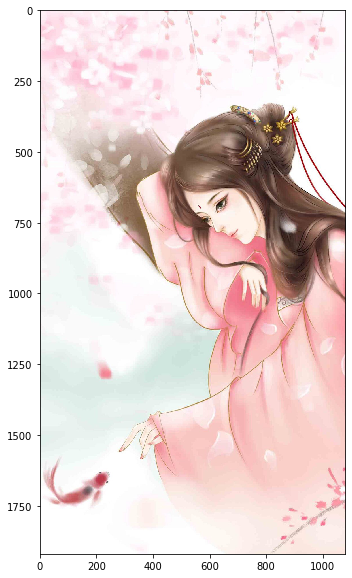

In [2]:
img = cv2.imread('./anime.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(figsize=[8, 10])
ax.imshow(img)
plt.show()

#### 1.use cv2.filter2D

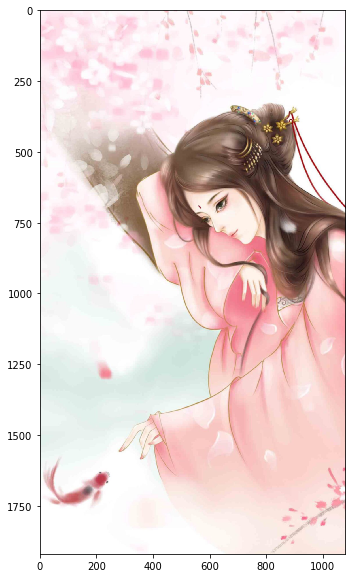

In [3]:
kernel_blur = np.ones(shape=[3, 3]).astype(np.float32) / 9
img_blur = cv2.filter2D(src=img, ddepth=-1, kernel=kernel_blur)

fig, ax = plt.subplots(figsize=[8, 10])
ax.imshow(img_blur)
plt.show()

#### 2. use cv2.blur

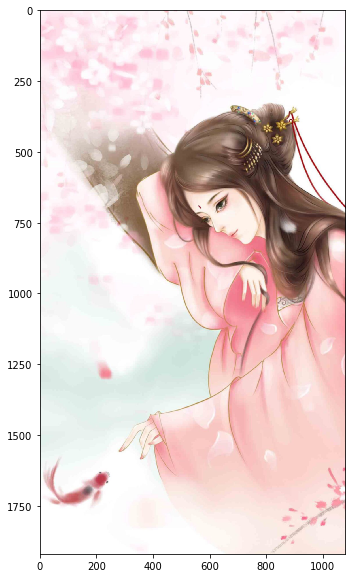

In [5]:
img_blur_2 = cv2.blur(src=img, ksize=(3, 3))

fig, ax = plt.subplots(figsize=[8, 10])
ax.imshow(img_blur_2)
plt.show()

In [6]:
np.mean(np.square(img_blur - img_blur_2))

0.0

#### cv2.GaussianBlur(src, dst, ksize, sigmaX, sigmaY=0, borderType=BORDER)
##### 作用：去除图像中的高斯噪声
+ src: 输入图像，图像深度为CV_8U、CV_16U、CV_16S、CV_32F、CV_64F。
+ dst: 输出图像，与输入图像有相同的类型和尺寸。
+ ksize: 高斯核大小，核大小可以为任意值，但是核的长和宽必须为正奇数，如果这两个值为0，他们的值将由sigma计算。
+ sigmaX: 高斯核函数在X方向上的标准偏差, 如果sigmaX是0, 则函数会自动将sigmaY的值设置为与sigmaX相同的值
+ sigmaY: 高斯核函数在Y方向上的标准偏差，如果sigmaX和sigmaY都是0，这两个值将由ksize.width和ksize.height计算而来。建议将size、sigmaX和sigmaY都指定出来。
+ borderType=BORDER_DEFAULT: 推断图像外部像素的某种便捷模式，有默认值BORDER_DEFAULT，如果没有特殊需要不用更改，具体可以参考borderInterpolate()函数

可以简单理解为创建一个kernel，这个kernel里的元素来自于某个高斯分布，然后将这个kernel运用cv2.filter2D

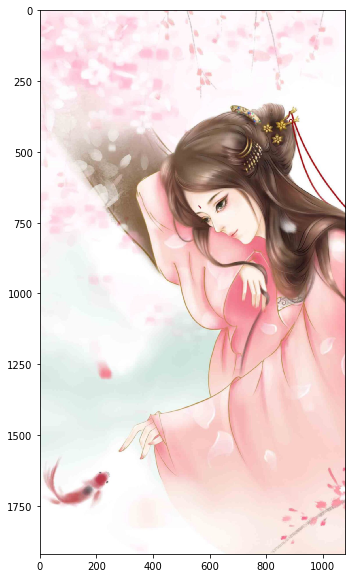

In [9]:
img_gaussian_blur = cv2.GaussianBlur(src=img, ksize=(5, 5), sigmaX=0)

fig, ax = plt.subplots(figsize=[8, 10])
ax.imshow(img_gaussian_blur)
plt.show()

#### cv2.medianBlur（src, dst, ksize）
+ src: 输入图像，图像为1、3、4通道的图像，当模板尺寸为3或5时，图像深度只能为CV_8U、CV_16U、CV_32F中的一个，如而对于较大孔径尺寸的图片，图像深度只能是CV_8U。
+ dst[可选参数]: 输出图像，尺寸和类型与输入图像一致，可以使用Mat::Clone以原图像为模板来初始化输出图像dst
+ ksize[int]: 滤波模板的尺寸大小，必须是大于1的奇数，如3、5、7……

##### 作用：
    中值滤波是一种典型的非线性滤波，是基于排序统计理论的一种能够有效抑制噪声的非线性信号处理技术，基本思想是用像素点邻域灰度值的中值来代替该像素点的灰度值，让周围的像素值接近真实的值从而消除孤立的噪声点。该方法在取出脉冲噪声、椒盐噪声的同时能保留图像的边缘细节。这些优良特性是线性滤波所不具备的。 
##### 算法：
    与卷积框对应像素的中值来替代中心像素的值


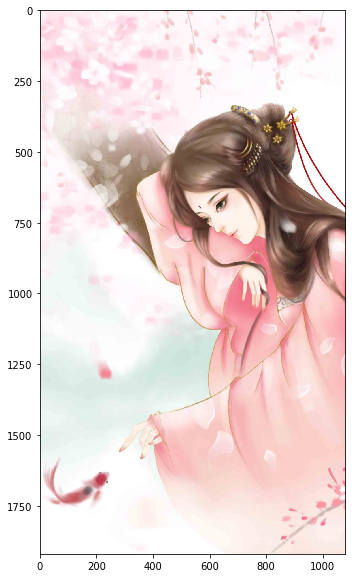

In [12]:
img_median = cv2.medianBlur(src=img, ksize=5)

fig, ax = plt.subplots(figsize=[8, 10])
ax.imshow(img_median)
plt.show()

#### cv2.bilateralFilter(src, dst, d, 
+ src: 原始图像：8-bit或floating-point，1-channel或3-channel）
+ dst[可选参数]: 目标图像：size和type与原始图像相同）
+ d: 过滤期间使用的各像素邻域的直径）
+ sigmaColor: 色彩空间的sigma参数，该参数较大时，各像素邻域内相距较远的颜色会被混合到一起，从而造成更大范围的半相等颜色
+ sigmaSpace: 坐标空间的sigma参数，该参数较大时，只要颜色相近，越远的像素会相互影响
+ borderType=BORDER_DEFAULT: 边界类型：指定如何确定图像范围外的像素的取值（在处理边缘像素时)，可参考BorderTypes



##### 简单起见，可以令2个sigma的值相等；
+ 如果他们很小（小于10），那么滤波器几乎没有什么效果；
+ 如果他们很大（大于150），那么滤波器的效果会很强，使图像显得非常卡通化；

##### 关于参数d：
+ 过大的滤波器（d>5）执行效率低。
+ 对于实时应用，建议取d=5；
+ 对于需要过滤严重噪声的离线应用，可取d=9；
+ d>0时，由d指定邻域直径；
+ d<=0时，d会自动由sigmaSpace的值确定，且d与sigmaSpace成正比；


##### 能在保持边界清晰的情况下有效的去除噪声，该滤波器只考虑像素间的空间关系而不考虑像素值之间的关系。

双边滤波同时使用空间高斯权重和灰度值相似性高斯权重。空间高斯函数去报只有邻近区域的像素对中心店有影响，灰度值相似性高斯函数确保只有像素灰度值相近的才会被用来做模糊运算。所以这种方法确保边界不会被模糊掉，因为边界处的灰度值变化比较大。

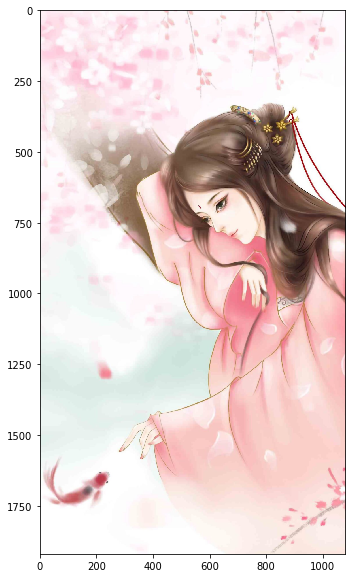

In [14]:
img_bila = cv2.bilateralFilter(src=img, d=5, sigmaColor=75, sigmaSpace=75)

fig, ax = plt.subplots(figsize=[8, 10])
ax.imshow(img_bila)
plt.show()